# Gradient Descent Methods


In [ ]:
#IMPORT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

%matplotlib inline
## Set a seed for the random number generator
np.random.seed(100)



### Gradient Descent Algorithm- One variable

Find a local minimum of a function $y=f(x)$ by using an iterative approach starting from some appropriate initialization $x=x_0$ for the minimum.

Start with random $x_{current}$, that is $x_0$, and repeat until convergence:
<div class='eqnbox'>
$$ \large
x_{next}= x_{current} - \gamma \; f'(x_{current}), \qquad
 $$
</div>

where $\gamma$ is called the 'learning rate'.

>0 f([0.13889581]) = 0.01929
>1 f([0.11111665]) = 0.01235
>2 f([0.08889332]) = 0.00790
>3 f([0.07111466]) = 0.00506
>4 f([0.05689173]) = 0.00324
>5 f([0.04551338]) = 0.00207
>6 f([0.0364107]) = 0.00133
>7 f([0.02912856]) = 0.00085
>8 f([0.02330285]) = 0.00054
>9 f([0.01864228]) = 0.00035
>10 f([0.01491382]) = 0.00022
>11 f([0.01193106]) = 0.00014
>12 f([0.00954485]) = 0.00009
>13 f([0.00763588]) = 0.00006
>14 f([0.0061087]) = 0.00004
>15 f([0.00488696]) = 0.00002
>16 f([0.00390957]) = 0.00002
>17 f([0.00312766]) = 0.00001
>18 f([0.00250212]) = 0.00001
>19 f([0.0020017]) = 0.00000
>20 f([0.00160136]) = 0.00000
>21 f([0.00128109]) = 0.00000
>22 f([0.00102487]) = 0.00000
>23 f([0.0008199]) = 0.00000
>24 f([0.00065592]) = 0.00000
>25 f([0.00052473]) = 0.00000
>26 f([0.00041979]) = 0.00000
>27 f([0.00033583]) = 0.00000
>28 f([0.00026866]) = 0.00000
>29 f([0.00021493]) = 0.00000


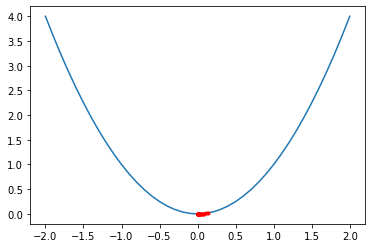

In [ ]:
# example of plotting a gradient descent search on a single-variable function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot

# objective function
def objective(x):
    return x**2

# derivative of objective function
def derivative(x):
    return 2 * x

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = solution - step_size * gradient
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

# define range for input
bounds = asarray([[-2.0, 2]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

<div class="alert alert-success" role="alert">
<strong>TASK 1</strong> Adapt the basic algorithm to use a variable step-size $\gamma_i$. Choose some different formulas for $\gamma_i$ and compare the performance (ie. rate of convergence) between them and with a fixed step-size. You may want to test with other objective functions as well.
</div>

Fixed Step Size
>0 f(-0.30743617693306435) = 0.09452
>1 f(-0.24594894154645147) = 0.06049
>2 f(-0.19675915323716117) = 0.03871
>3 f(-0.15740732258972895) = 0.02478
>4 f(-0.12592585807178316) = 0.01586
>5 f(-0.10074068645742654) = 0.01015
>6 f(-0.08059254916594123) = 0.00650
>7 f(-0.06447403933275299) = 0.00416
>8 f(-0.05157923146620239) = 0.00266
>9 f(-0.041263385172961915) = 0.00170
>10 f(-0.03301070813836953) = 0.00109
>11 f(-0.026408566510695626) = 0.00070
>12 f(-0.0211268532085565) = 0.00045
>13 f(-0.016901482566845198) = 0.00029
>14 f(-0.013521186053476159) = 0.00018
>15 f(-0.010816948842780926) = 0.00012
>16 f(-0.00865355907422474) = 0.00007
>17 f(-0.006922847259379793) = 0.00005
>18 f(-0.005538277807503834) = 0.00003
>19 f(-0.004430622246003067) = 0.00002
>20 f(-0.0035444977968024536) = 0.00001
>21 f(-0.0028355982374419627) = 0.00001
>22 f(-0.0022684785899535704) = 0.00001
>23 f(-0.0018147828719628563) = 0.00000
>24 f(-0.001451826297570285) = 0.00000
>25 f(-0.001161461038056228)

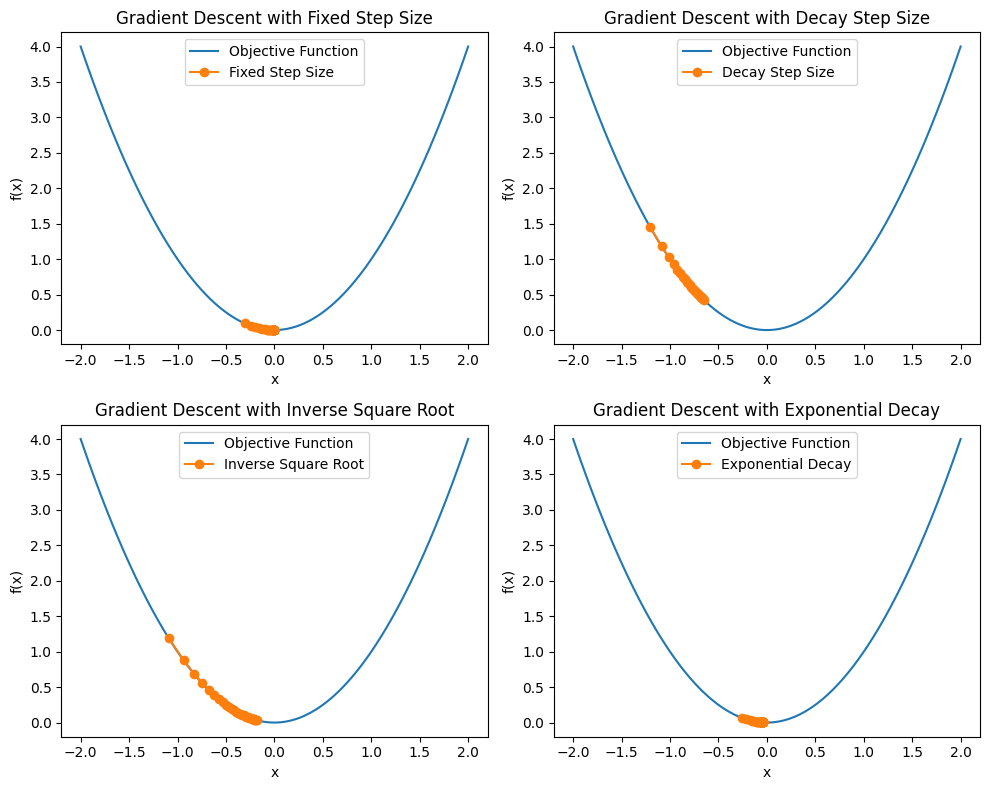

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function and its derivative
def objective(x):
    return x**2

def derivative(x):
    return 2 * x

# Gradient descent with variable step size
def gradient_descent_variable(objective, derivative, bounds, n_iter, initial_step, step_formula):
    solutions, scores = [], []
    solution = bounds[0] + np.random.rand() * (bounds[1] - bounds[0])

    for i in range(n_iter):
        step_size = step_formula(initial_step, i)
        gradient = derivative(solution)
        solution = solution - step_size * gradient
        solutions.append(solution)
        scores.append(objective(solution))
        print(f">{i} f({solution}) = {objective(solution):.5f}")

    return solutions, scores

# Gradient descent with fixed step size
def gradient_descent_fixed(objective, derivative, bounds, n_iter, step_size):
    solutions, scores = [], []
    solution = bounds[0] + np.random.rand() * (bounds[1] - bounds[0])

    for i in range(n_iter):
        gradient = derivative(solution)
        solution = solution - step_size * gradient
        solutions.append(solution)
        scores.append(objective(solution))
        print(f">{i} f({solution}) = {objective(solution):.5f}")

    return solutions, scores

# Step size formulas
def step_formula_linear(initial_step, i):
    return initial_step / (1 + i)

def step_formula_sqrt(initial_step, i):
    return initial_step / np.sqrt(i + 1)

def step_formula_exponential(initial_step, i):
    decay_rate = 0.1
    return initial_step * np.exp(-decay_rate * i)

# Parameters
bounds = [-2.0, 2.0]
n_iter = 30
initial_step = 0.1
fixed_step_size = 0.1

# Fixed step size
print("Fixed Step Size")
solutions_fixed, scores_fixed = gradient_descent_fixed(objective, derivative, bounds, n_iter, fixed_step_size)

# Decay step size (Linear)
print("\nDecay Step Size (Linear)")
solutions_linear, scores_linear = gradient_descent_variable(objective, derivative, bounds, n_iter, initial_step, step_formula_linear)

# Inverse square root step size
print("\nInverse Square Root Step Size")
solutions_sqrt, scores_sqrt = gradient_descent_variable(objective, derivative, bounds, n_iter, initial_step, step_formula_sqrt)

# Exponential decay step size
print("\nExponential Decay Step Size")
solutions_exponential, scores_exponential = gradient_descent_variable(objective, derivative, bounds, n_iter, initial_step, step_formula_exponential)

# Visualization
plt.figure(figsize=(10, 8))

# Fixed step size
plt.subplot(2, 2, 1)
plt.plot(np.linspace(bounds[0], bounds[1], 100), objective(np.linspace(bounds[0], bounds[1], 100)), label="Objective Function")
plt.plot(solutions_fixed, scores_fixed, 'o-', label="Fixed Step Size")
plt.title("Gradient Descent with Fixed Step Size")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Decay step size (Linear)
plt.subplot(2, 2, 2)
plt.plot(np.linspace(bounds[0], bounds[1], 100), objective(np.linspace(bounds[0], bounds[1], 100)), label="Objective Function")
plt.plot(solutions_linear, scores_linear, 'o-', label="Decay Step Size")
plt.title("Gradient Descent with Decay Step Size")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Inverse square root step size
plt.subplot(2, 2, 3)
plt.plot(np.linspace(bounds[0], bounds[1], 100), objective(np.linspace(bounds[0], bounds[1], 100)), label="Objective Function")
plt.plot(solutions_sqrt, scores_sqrt, 'o-', label="Inverse Square Root")
plt.title("Gradient Descent with Inverse Square Root")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Exponential decay step size
plt.subplot(2, 2, 4)
plt.plot(np.linspace(bounds[0], bounds[1], 100), objective(np.linspace(bounds[0], bounds[1], 100)), label="Objective Function")
plt.plot(solutions_exponential, scores_exponential, 'o-', label="Exponential Decay")
plt.title("Gradient Descent with Exponential Decay")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.tight_layout()
plt.show()


### Gradient descent - local vs. global minima

>0 f([-0.4324636]) = -0.28066
>1 f([-0.64608192]) = -0.84936
>2 f([-0.95507198]) = -1.86154
>3 f([-1.27065723]) = -2.58079
>4 f([-1.3665571]) = -2.61588
>5 f([-1.33899648]) = -2.61812
>6 f([-1.34991275]) = -2.61850
>7 f([-1.34588375]) = -2.61855
>8 f([-1.34741557]) = -2.61855
>9 f([-1.34683936]) = -2.61856
>10 f([-1.347057]) = -2.61856
>11 f([-1.34697492]) = -2.61856
>12 f([-1.34700589]) = -2.61856
>13 f([-1.34699421]) = -2.61856
>14 f([-1.34699862]) = -2.61856
>15 f([-1.34699695]) = -2.61856
>16 f([-1.34699758]) = -2.61856
>17 f([-1.34699734]) = -2.61856
>18 f([-1.34699743]) = -2.61856
>19 f([-1.3469974]) = -2.61856
>20 f([-1.34699741]) = -2.61856
>21 f([-1.34699741]) = -2.61856
>22 f([-1.34699741]) = -2.61856
>23 f([-1.34699741]) = -2.61856
>24 f([-1.34699741]) = -2.61856
>25 f([-1.34699741]) = -2.61856
>26 f([-1.34699741]) = -2.61856
>27 f([-1.34699741]) = -2.61856
>28 f([-1.34699741]) = -2.61856
>29 f([-1.34699741]) = -2.61856


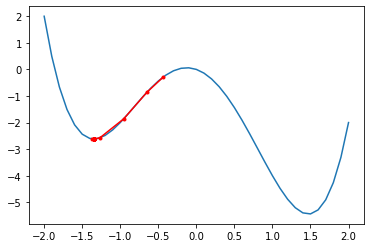

In [ ]:
# example of plotting a gradient descent search on a single-variable function
# objective function
def objective(x):
    return x**4-4*x**2-x

# derivative of objective function
def derivative(x):
    return 4*x ** 3-8*x-1

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = solution - step_size * gradient
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

# define range for input
bounds = asarray([[-2.0, 2.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

### Gradient descent with momentum

Momentum - weight by previous points, allows the search to build inertia in a direction in the search space, can overcome the oscillations of noisy gradients and navigate flat spots

>0 f([0.55164181]) = 0.30431
>1 f([0.39994031]) = 0.15995
>2 f([0.2744418]) = 0.07532
>3 f([0.18190389]) = 0.03309
>4 f([0.11776174]) = 0.01387
>5 f([0.07496674]) = 0.00562
>6 f([0.0471349]) = 0.00222
>7 f([0.02935836]) = 0.00086
>8 f([0.01815373]) = 0.00033
>9 f([0.01116159]) = 0.00012
>10 f([0.00683164]) = 0.00005
>11 f([0.00416632]) = 0.00002
>12 f([0.00253346]) = 0.00001
>13 f([0.00153691]) = 0.00000
>14 f([0.00093056]) = 0.00000
>15 f([0.00056255]) = 0.00000
>16 f([0.00033963]) = 0.00000
>17 f([0.00020483]) = 0.00000
>18 f([0.00012343]) = 0.00000
>19 f([7.43181534e-05]) = 0.00000
>20 f([4.47224137e-05]) = 0.00000
>21 f([2.6899209e-05]) = 0.00000
>22 f([1.61724058e-05]) = 0.00000
>23 f([9.71988371e-06]) = 0.00000
>24 f([5.84015033e-06]) = 0.00000
>25 f([3.50820025e-06]) = 0.00000
>26 f([2.10697518e-06]) = 0.00000
>27 f([1.26521262e-06]) = 0.00000
>28 f([7.59641328e-07]) = 0.00000
>29 f([4.56041675e-07]) = 0.00000


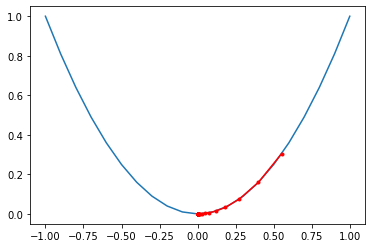

In [ ]:
# example of plotting gradient descent with momentum for a single-variable function
# objective function
def objective(x):
    return x**2.0

# derivative of objective function
def derivative(x):
    return x * 2.0

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # keep track of the change
    change = 0.0
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # calculate update
        new_change = step_size * gradient + momentum * change
        # take a step
        solution = solution - new_change
        # save the change
        change = new_change
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]


# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

>0 f([1.1763205]) = -0.09673
>1 f([1.0133924]) = -0.01303
>2 f([0.97753058]) = 0.02345
>3 f([1.05737905]) = -0.05022
>4 f([1.19526751]) = -0.09522
>5 f([1.29017665]) = -0.04138
>6 f([1.26447762]) = -0.06419
>7 f([1.16777386]) = -0.09652
>8 f([1.09607905]) = -0.07487
>9 f([1.09162874]) = -0.07246
>10 f([1.14355304]) = -0.09304
>11 f([1.20794122]) = -0.09262
>12 f([1.23376317]) = -0.08316
>13 f([1.20662515]) = -0.09295
>14 f([1.16031145]) = -0.09589
>15 f([1.13435814]) = -0.09065
>16 f([1.14263516]) = -0.09283
>17 f([1.17273165]) = -0.09671
>18 f([1.19880211]) = -0.09462
>19 f([1.20142474]) = -0.09412
>20 f([1.18316934]) = -0.09651
>21 f([1.16264317]) = -0.09613
>22 f([1.1556365]) = -0.09529
>23 f([1.16446814]) = -0.09629
>24 f([1.17962187]) = -0.09667
>25 f([1.18854037]) = -0.09608
>26 f([1.18558544]) = -0.09634
>27 f([1.17543279]) = -0.09673
>28 f([1.16727886]) = -0.09649
>29 f([1.16678785]) = -0.09646


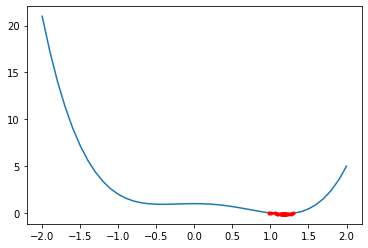

In [ ]:
# example of plotting gradient descent with momentum for a single-variable function
# objective function
def objective(x):
    return x**4-x**3-x**2+1

# derivative of objective function
def derivative(x):
    return 4*x ** 3-3*x**2-2*x

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # keep track of the change
    change = 0.0
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # calculate update
        new_change = step_size * gradient + momentum * change
        # take a step
        solution = solution - new_change
        # save the change
        change = new_change
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]


# define range for input
bounds = asarray([[-2.0, 2.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = ## TO DO
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

<div class="alert alert-success" role="alert">
<strong>TASK 3</strong> Use momentum values of 0.1, 0.3, 0.7, 0.9 in the code above, with objective function $f(x)=x^4-x^3-x^2+1$, and compare your results. Explain any differences that you see, especially whether there is convergence to the global minimum.</div>


Momentum = 0.1
>0 f(0.89050) = 0.12969
>1 f(1.03905) = -0.03582
>2 f(1.13689) = -0.09137
>3 f(1.17403) = -0.09673
>4 f(1.17876) = -0.09669
>5 f(1.17669) = -0.09673
>6 f(1.17550) = -0.09673
>7 f(1.17530) = -0.09673
>8 f(1.17535) = -0.09673
>9 f(1.17538) = -0.09673
>10 f(1.17539) = -0.09673
>11 f(1.17539) = -0.09673
>12 f(1.17539) = -0.09673
>13 f(1.17539) = -0.09673
>14 f(1.17539) = -0.09673
>15 f(1.17539) = -0.09673
>16 f(1.17539) = -0.09673
>17 f(1.17539) = -0.09673
>18 f(1.17539) = -0.09673
>19 f(1.17539) = -0.09673
>20 f(1.17539) = -0.09673
>21 f(1.17539) = -0.09673
>22 f(1.17539) = -0.09673
>23 f(1.17539) = -0.09673
>24 f(1.17539) = -0.09673
>25 f(1.17539) = -0.09673
>26 f(1.17539) = -0.09673
>27 f(1.17539) = -0.09673
>28 f(1.17539) = -0.09673
>29 f(1.17539) = -0.09673

Momentum = 0.3
>0 f(-0.53721) = 0.94973
>1 f(-0.38011) = 0.93131
>2 f(-0.34368) = 0.93643
>3 f(-0.34982) = 0.93541
>4 f(-0.36779) = 0.93278
>5 f(-0.38626) = 0.93069
>6 f(-0.40124) = 0.92952
>7 f(-0.41185) = 0.92901

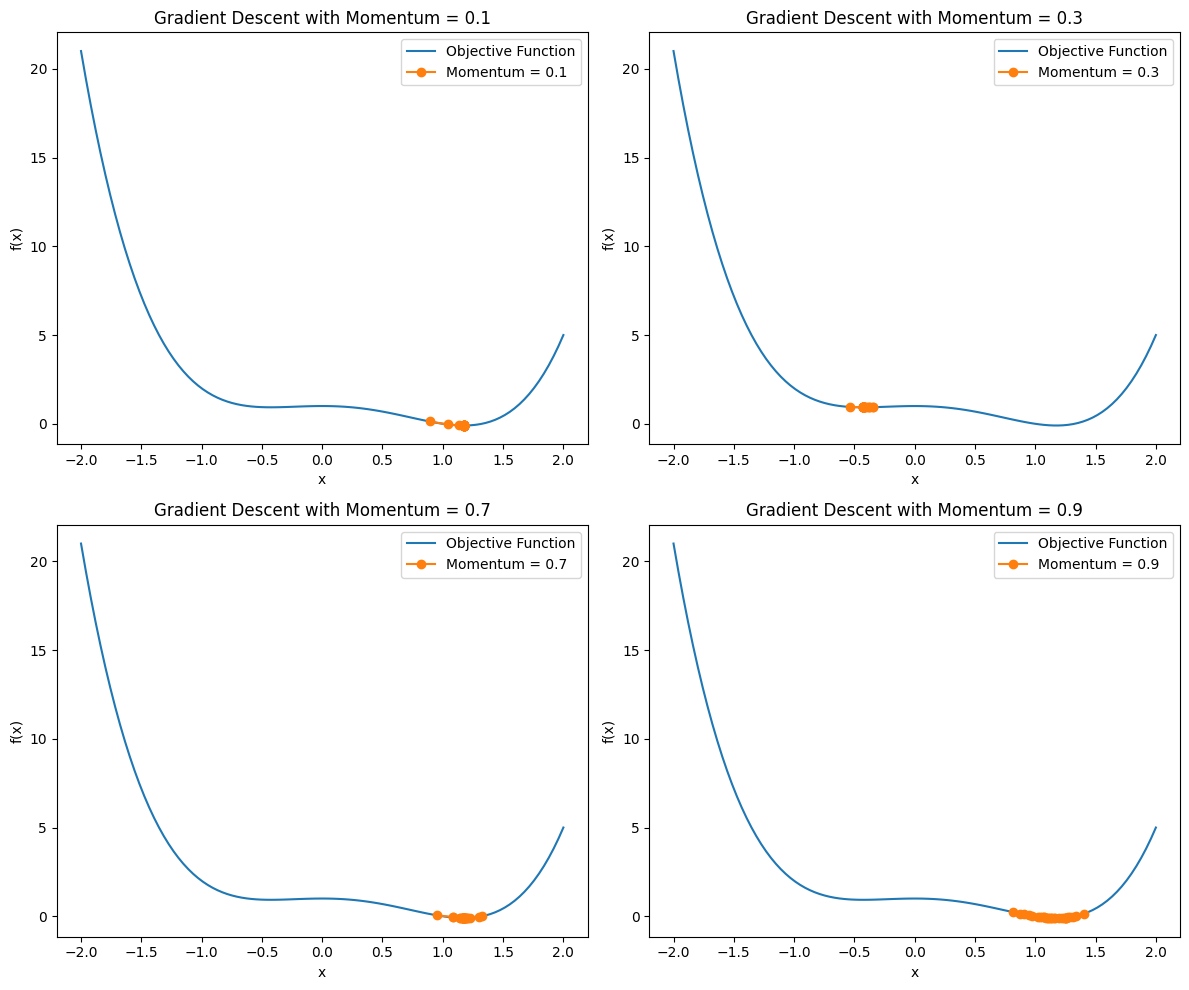

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function and its derivative
def objective(x):
    return x**4 - x**3 - x**2 + 1

def derivative(x):
    return 4 * x**3 - 3 * x**2 - 2 * x

# Gradient descent with momentum
def gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum):
    solutions, scores = [], []
    solution = bounds[0] + np.random.rand() * (bounds[1] - bounds[0])
    change = 0.0

    for i in range(n_iter):
        gradient = derivative(solution)
        new_change = step_size * gradient + momentum * change
        solution = solution - new_change
        change = new_change
        solutions.append(solution)
        scores.append(objective(solution))
        print(f">{i} f({solution:.5f}) = {objective(solution):.5f}")

    return solutions, scores

# Parameters
bounds = [-2.0, 2.0]
n_iter = 30
step_size = 0.1
momentum_values = [0.1, 0.3, 0.7, 0.9]

# Visualization
plt.figure(figsize=(12, 10))

for idx, momentum in enumerate(momentum_values):
    print(f"\nMomentum = {momentum}")
    solutions, scores = gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum)

    # Plot results
    plt.subplot(2, 2, idx + 1)
    plt.plot(np.linspace(bounds[0], bounds[1], 100), objective(np.linspace(bounds[0], bounds[1], 100)), label="Objective Function")
    plt.plot(solutions, scores, 'o-', label=f"Momentum = {momentum}")
    plt.title(f"Gradient Descent with Momentum = {momentum}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()

plt.tight_layout()
plt.show()


Momentum values influence the speed and stability of gradient descent convergence. Lower momentum (e.g., 0.1) results in slow but stable convergence, while moderate momentum (e.g., 0.3 or 0.7) strikes a balance, accelerating convergence with minimal oscillations. High momentum (e.g., 0.9) significantly speeds up convergence but risks overshooting or oscillating around the global minimum before stabilizing. All momentum values eventually converge to the global minimum for this function due to its smooth behavior and the small step size, but higher momentum values can make the trajectory less stable. A moderate momentum value typically offers the best balance between speed and stability.

<div class="alert alert-success" role="alert">
<strong>TASK 3</strong> Use the gradient descent with momentum algorithm with the objective function $f(x)=x^4-4x^2-x$. Can you find choices for step-size and momentum that reliably perform well, i.e. converges towards the global minimum? If so, explain why you think these choices work well. If not, explain what obstacles you encounter and why they may be difficult to overcome.</div>


Step Size = 0.05, Momentum = 0.1
> 0 f(0.70799) = -2.46172
> 1 f(0.99236) = -3.96169
> 2 f(1.27229) = -5.12692
> 3 f(1.44730) = -5.43834
> 4 f(1.48740) = -5.44230
> 5 f(1.47824) = -5.44394
> 6 f(1.47257) = -5.44419
> 7 f(1.47239) = -5.44419
> 8 f(1.47292) = -5.44419
> 9 f(1.47304) = -5.44419
> 10 f(1.47301) = -5.44419
> 11 f(1.47300) = -5.44419
> 12 f(1.47300) = -5.44419
> 13 f(1.47300) = -5.44419
> 14 f(1.47300) = -5.44419
> 15 f(1.47300) = -5.44419
> 16 f(1.47300) = -5.44419
> 17 f(1.47300) = -5.44419
> 18 f(1.47300) = -5.44419
> 19 f(1.47300) = -5.44419
> 20 f(1.47300) = -5.44419
> 21 f(1.47300) = -5.44419
> 22 f(1.47300) = -5.44419
> 23 f(1.47300) = -5.44419
> 24 f(1.47300) = -5.44419
> 25 f(1.47300) = -5.44419
> 26 f(1.47300) = -5.44419
> 27 f(1.47300) = -5.44419
> 28 f(1.47300) = -5.44419
> 29 f(1.47300) = -5.44419

Step Size = 0.05, Momentum = 0.3
> 0 f(0.37777) = -0.92824
> 1 f(0.61062) = -1.96305
> 2 f(0.92920) = -3.63734
> 3 f(1.28599) = -5.16612
> 4 f(1.53208) = -5.41149
> 

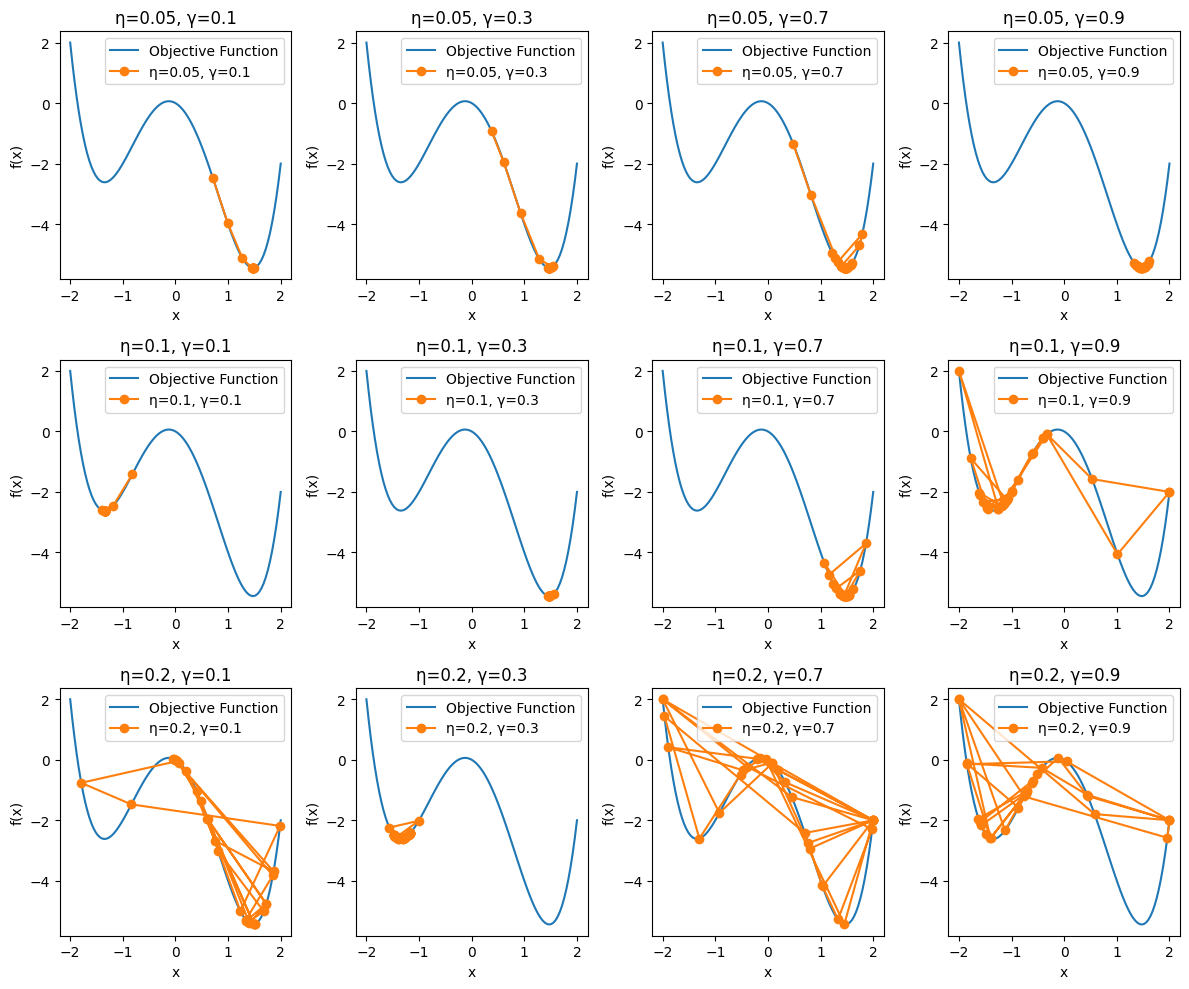

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function and its derivative
def objective(x):
    return x**4 - 4 * x**2 - x

def derivative(x):
    return 4 * x**3 - 8 * x - 1

# Gradient descent with momentum
def gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum):
    solutions, scores = [], []
    solution = bounds[0] + np.random.rand() * (bounds[1] - bounds[0])
    change = 0.0

    for i in range(n_iter):
        gradient = derivative(solution)
        new_change = step_size * gradient + momentum * change
        solution = solution - new_change
        # Clip solution to prevent overflow
        solution = np.clip(solution, bounds[0], bounds[1])
        change = new_change
        solutions.append(solution)
        scores.append(objective(solution))
        print(f"> {i} f({solution:.5f}) = {objective(solution):.5f}")

    return solutions, scores

# Parameters
bounds = [-2.0, 2.0]
n_iter = 30
step_size_values = [0.05, 0.1, 0.2]
momentum_values = [0.1, 0.3, 0.7, 0.9]

# Visualization
plt.figure(figsize=(12, 10))

plot_index = 1
for step_size in step_size_values:
    for momentum in momentum_values:
        print(f"\nStep Size = {step_size}, Momentum = {momentum}")
        solutions, scores = gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum)

        # Plot results
        plt.subplot(len(step_size_values), len(momentum_values), plot_index)
        plt.plot(np.linspace(bounds[0], bounds[1], 100), objective(np.linspace(bounds[0], bounds[1], 100)), label="Objective Function")
        plt.plot(solutions, scores, 'o-', label=f"η={step_size}, γ={momentum}")
        plt.title(f"η={step_size}, γ={momentum}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend()
        plot_index += 1

plt.tight_layout()
plt.show()


### Gradient descent for functions of two variables


<div class="alert alert-success" role="alert">
<strong>TASK 4</strong> Define delta_w in the code below for gradient descent in the two-variable case.</div>

In [ ]:
# Make threshold a -ve value if you want to run exactly
# max_iterations.
def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=0.05,momentum=0.8):

    w = w_init
    w_history = w
    f_history = obj_func(w,extra_param)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10

    while  i<max_iterations and diff>threshold:
        delta_w = ## TO DO
        w = w+delta_w

        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,extra_param)))

        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])

    return w_history,f_history

SyntaxError: invalid syntax (4294774996.py, line 15)

Objective function $f(x,y)=x^2+y^2$

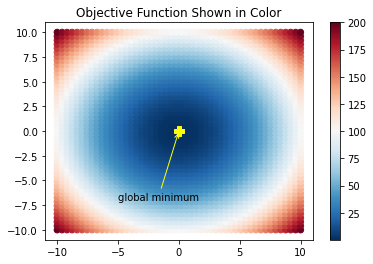

In [ ]:
def visualize_fw():
    xcoord = np.linspace(-10.0,10.0,50)
    ycoord = np.linspace(-10.0,10.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))

    # All 2D points on the grid
    pts = pts.transpose()

    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')

pts,f_vals = visualize_fw()

In [ ]:
# Objective function
def f(w,extra=[]):
    return np.sum(w*w)

# Function to compute the gradient
def grad(w,extra=[]):
    return 2*w

# Function to plot the objective function
# and learning history annotated by arrows
# to show how learning proceeded
def visualize_learning(w_history):

    # Make the function plot
    function_plot(pts,f_vals)

    # Plot the history
    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta')

    # Annotate the point found at last iteration
    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'green')
    iter = w_history.shape[0]
    for w,i in zip(w_history,range(iter-1)):
        # Annotate with arrows to show history
        plt.annotate("",
                    xy=w, xycoords='data',
                    xytext=w_history[i+1,:], textcoords='data',
                    arrowprops=dict(arrowstyle='<-',
                            connectionstyle='angle3'))

def solve_fw():
    # Setting up
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-10,10,2)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
    learning_rates = [0.05,0.2,0.5,0.8]
    momentum = [0,0.5,0.9]
    ind = 1

    # Iteration through all possible parameter combinations
    for alpha in momentum:
        for eta,col in zip(learning_rates,[0,1,2,3]):
            plt.subplot(3,4,ind)
            w_history,f_history = gradient_descent(5,-1,w_init, f,grad,[],eta,alpha)

            visualize_learning(w_history)
            ind = ind+1
            plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
            if col==1:
                plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()

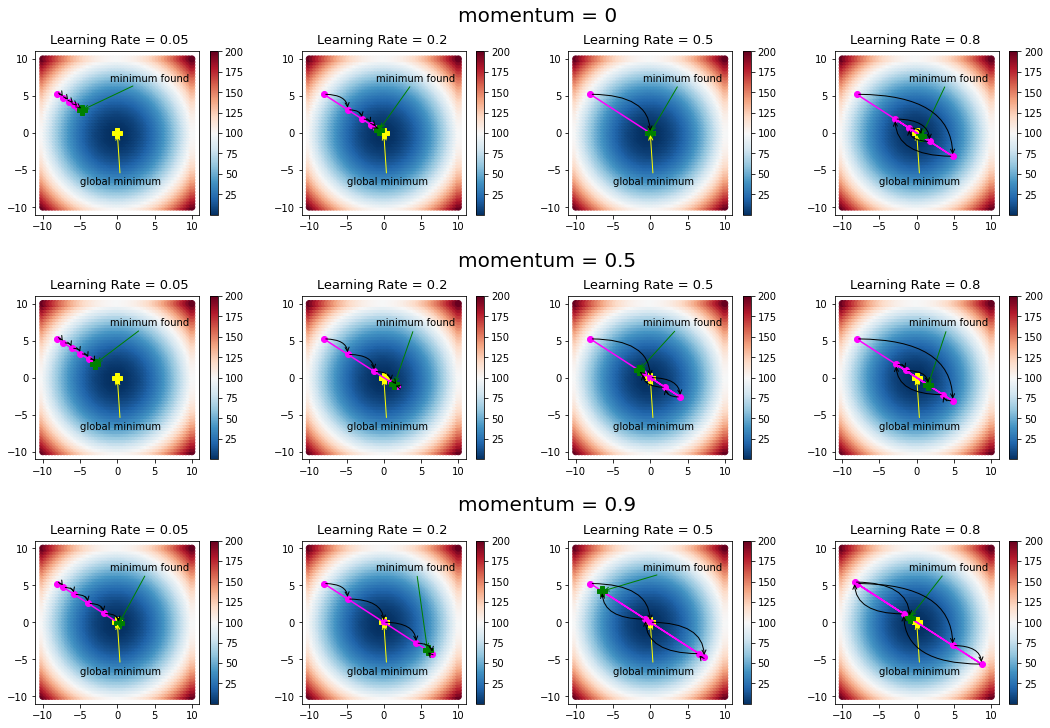

In [ ]:
solve_fw()

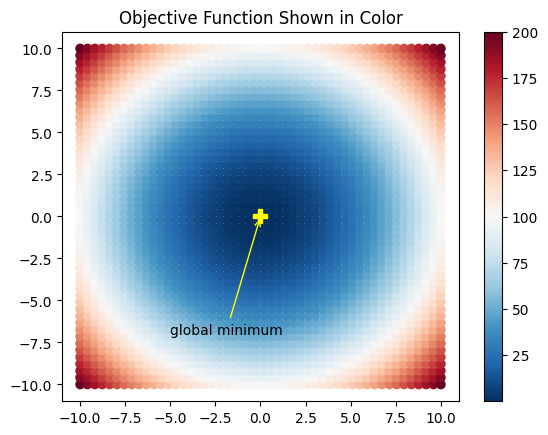

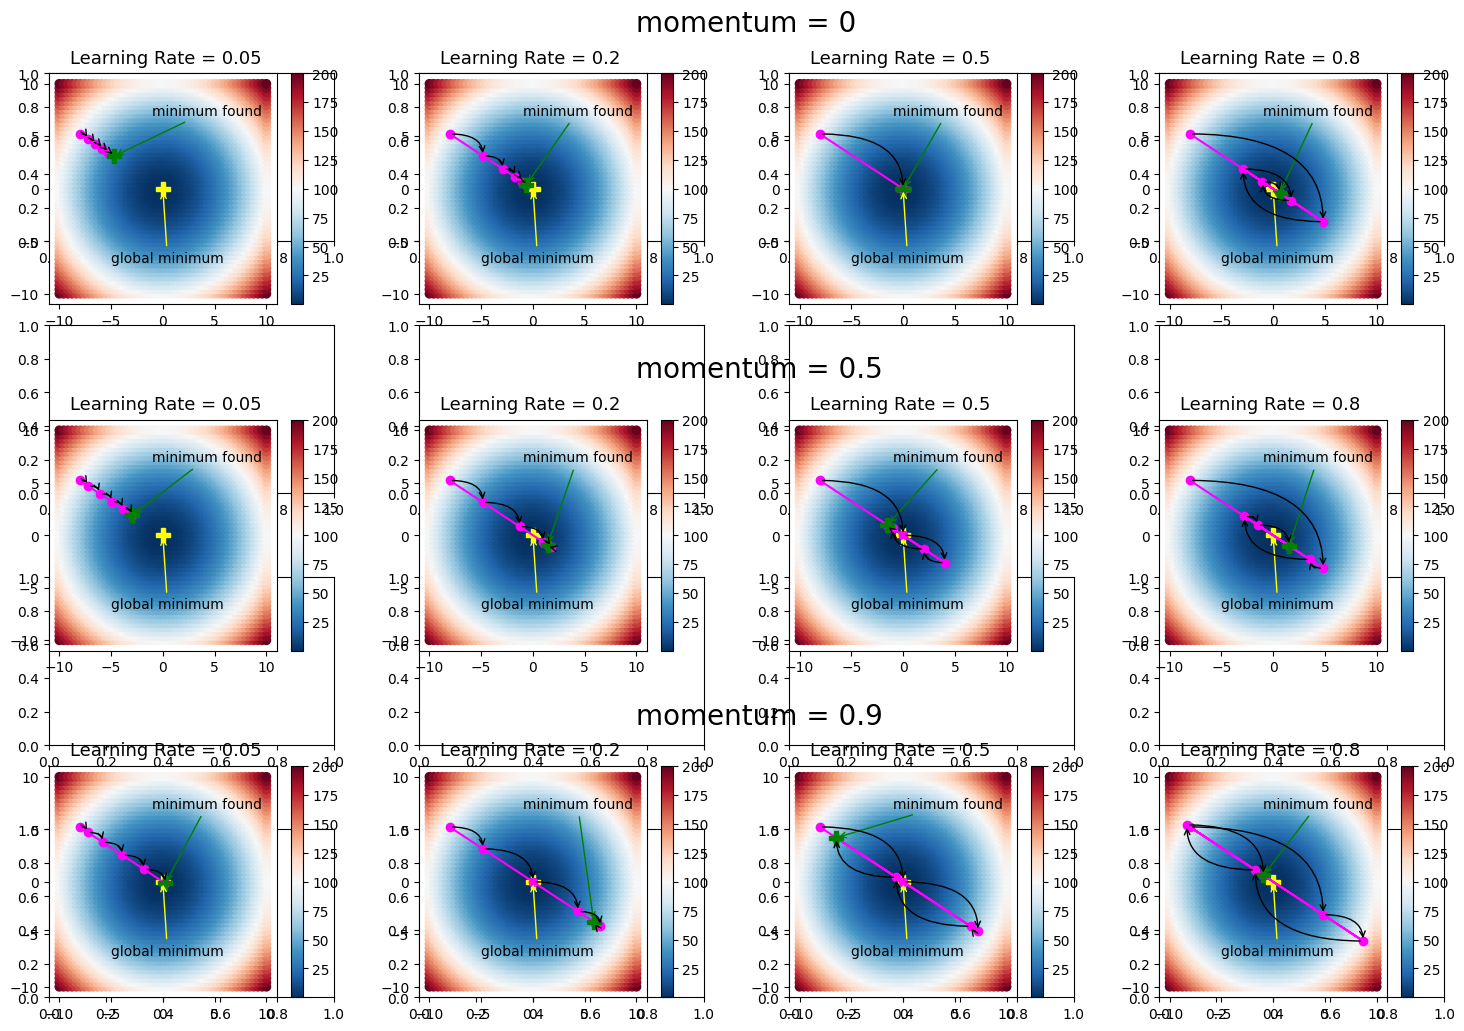

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gradient descent function with delta_w
def gradient_descent(max_iterations, threshold, w_init, obj_func, grad_func, extra_param=[], learning_rate=0.05, momentum=0.8):
    w = w_init
    w_history = w
    f_history = obj_func(w, extra_param)
    delta_w = np.zeros(w.shape)  # Initialize delta_w
    i = 0
    diff = 1.0e10  # Initialize a large difference value

    while i < max_iterations and diff > threshold:
        # Define delta_w
        delta_w = -learning_rate * grad_func(w, extra_param) + momentum * delta_w

        # Update w using delta_w
        w = w + delta_w

        # Store the history of w and f
        w_history = np.vstack((w_history, w))
        f_history = np.vstack((f_history, obj_func(w, extra_param)))

        # Update iteration number and difference between successive objective function values
        i += 1
        diff = np.absolute(f_history[-1] - f_history[-2])

    return w_history, f_history

# Visualize the objective function in 2D
def visualize_fw():
    xcoord = np.linspace(-10.0, 10.0, 50)
    ycoord = np.linspace(-10.0, 10.0, 50)
    w1, w2 = np.meshgrid(xcoord, ycoord)
    pts = np.vstack((w1.flatten(), w2.flatten()))

    # All 2D points on the grid
    pts = pts.transpose()

    # Function value at each point
    f_vals = np.sum(pts * pts, axis=1)
    function_plot(pts, f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts, f_vals

# Helper function to annotate a single point
def annotate_pt(text, xy, xytext, color):
    plt.plot(xy[0], xy[1], marker='P', markersize=10, c=color)
    plt.annotate(text, xy=xy, xytext=xytext,
                 arrowprops=dict(arrowstyle="->",
                                 color=color,
                                 connectionstyle='arc3'))

# Plot the function
def function_plot(pts, f_val):
    f_plot = plt.scatter(pts[:, 0], pts[:, 1], c=f_val, vmin=min(f_val), vmax=max(f_val), cmap='RdBu_r')
    plt.colorbar(f_plot)
    annotate_pt('global minimum', (0, 0), (-5, -7), 'yellow')

# Objective function
def f(w, extra=[]):
    return np.sum(w * w)

# Gradient of the objective function
def grad(w, extra=[]):
    return 2 * w

# Function to plot the learning history
def visualize_learning(w_history):
    # Make the function plot
    function_plot(pts, f_vals)

    # Plot the history
    plt.plot(w_history[:, 0], w_history[:, 1], marker='o', c='magenta')

    # Annotate the point found at the last iteration
    annotate_pt('minimum found',
                (w_history[-1, 0], w_history[-1, 1]),
                (-1, 7), 'green')
    iter = w_history.shape[0]
    for w, i in zip(w_history, range(iter - 1)):
        plt.annotate("", xy=w, xycoords='data',
                     xytext=w_history[i + 1, :], textcoords='data',
                     arrowprops=dict(arrowstyle='<-',
                                     connectionstyle='angle3'))

# Solve the gradient descent problem with visualization
def solve_fw():
    # Setting up
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-10, 10, 2)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
    learning_rates = [0.05, 0.2, 0.5, 0.8]
    momentum = [0, 0.5, 0.9]
    ind = 1

    # Iterate through all parameter combinations
    for alpha in momentum:
        for eta, col in zip(learning_rates, [0, 1, 2, 3]):
            plt.subplot(3, 4, ind)
            w_history, f_history = gradient_descent(5, -1, w_init, f, grad, [], eta, alpha)
            visualize_learning(w_history)
            ind = ind + 1
            plt.text(-9, 12, 'Learning Rate = ' + str(eta), fontsize=13)
            if col == 1:
                plt.text(10, 15, 'momentum = ' + str(alpha), fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()

# Run the visualization
pts, f_vals = visualize_fw()
solve_fw()


<div class="alert alert-success" role="alert">
<strong>TASK 5 (Do not submit)</strong> Apply this to other objective functions of your choosing, for example use some $f(x,y)$ which has both local and global minima, and see if you can find choices for step-size and momentum which is reliable</div>

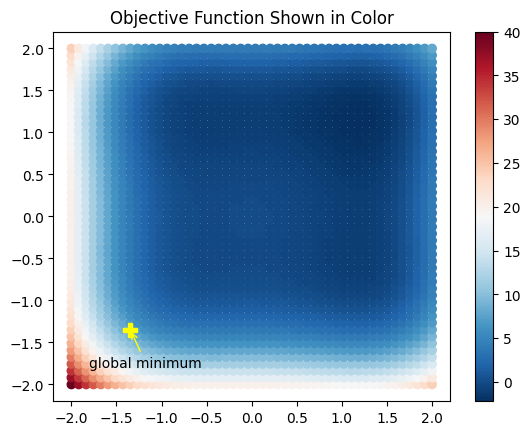

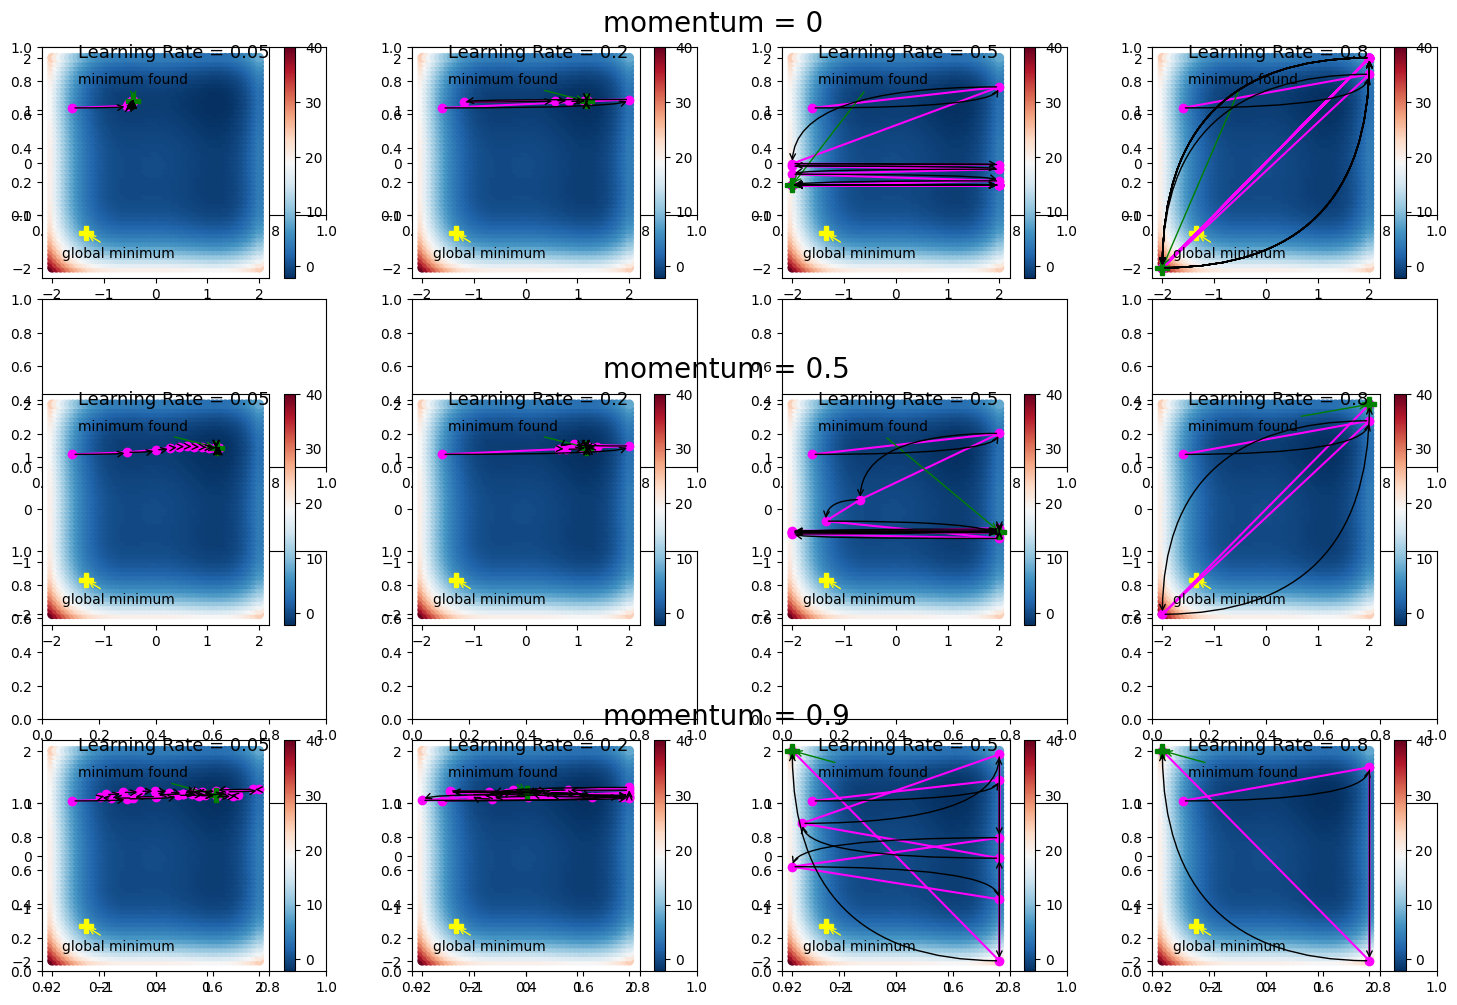

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gradient descent function with delta_w
def gradient_descent(max_iterations, threshold, w_init, obj_func, grad_func, extra_param=[], learning_rate=0.05, momentum=0.8):
    w = w_init
    w_history = w
    f_history = obj_func(w, extra_param)
    delta_w = np.zeros(w.shape)  # Initialize delta_w
    i = 0
    diff = 1.0e10  # Initialize a large difference value

    while i < max_iterations and diff > threshold:
        # Define delta_w
        delta_w = -learning_rate * grad_func(w, extra_param) + momentum * delta_w
        # Clip values to prevent overflow
        w = np.clip(w + delta_w, -2, 2)

        # Store the history of w and f
        w_history = np.vstack((w_history, w))
        f_history = np.vstack((f_history, obj_func(w, extra_param)))

        # Update iteration number and difference between successive objective function values
        i += 1
        diff = np.absolute(f_history[-1] - f_history[-2])

        # Check for NaNs and break if encountered
        if np.any(np.isnan(w)) or np.any(np.isnan(f_history)):
            print("NaN encountered. Stopping gradient descent.")
            break

    return w_history, f_history

# Define the new objective function with local and global minima
def f(w, extra=[]):
    x, y = w[0], w[1]
    return (x**4 - x**3 - x**2) + (y**4 - y**3 - y**2)

# Define the gradient of the objective function
def grad(w, extra=[]):
    x, y = w[0], w[1]
    dx = 4 * x**3 - 3 * x**2 - 2 * x
    dy = 4 * y**3 - 3 * y**2 - 2 * y
    return np.array([dx, dy])

# Function to visualize the objective function in 2D
def visualize_fw():
    xcoord = np.linspace(-2.0, 2.0, 50)
    ycoord = np.linspace(-2.0, 2.0, 50)
    w1, w2 = np.meshgrid(xcoord, ycoord)
    pts = np.vstack((w1.flatten(), w2.flatten()))

    # All 2D points on the grid
    pts = pts.transpose()

    # Function value at each point
    f_vals = np.apply_along_axis(f, 1, pts)
    function_plot(pts, f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts, f_vals

# Helper function to annotate a single point
def annotate_pt(text, xy, xytext, color):
    plt.plot(xy[0], xy[1], marker='P', markersize=10, c=color)
    plt.annotate(text, xy=xy, xytext=xytext,
                 arrowprops=dict(arrowstyle="->",
                                 color=color,
                                 connectionstyle='arc3'))

# Plot the function
def function_plot(pts, f_val):
    f_plot = plt.scatter(pts[:, 0], pts[:, 1], c=f_val, vmin=min(f_val), vmax=max(f_val), cmap='RdBu_r')
    plt.colorbar(f_plot)
    annotate_pt('global minimum', (-1.346, -1.346), (-1.8, -1.8), 'yellow')

# Function to visualize the learning history
def visualize_learning(w_history):
    # Make the function plot
    function_plot(pts, f_vals)

    # Plot the history
    plt.plot(w_history[:, 0], w_history[:, 1], marker='o', c='magenta')

    # Annotate the point found at the last iteration
    annotate_pt('minimum found',
                (w_history[-1, 0], w_history[-1, 1]),
                (-1.5, 1.5), 'green')
    iter = w_history.shape[0]
    for w, i in zip(w_history, range(iter - 1)):
        plt.annotate("", xy=w, xycoords='data',
                     xytext=w_history[i + 1, :], textcoords='data',
                     arrowprops=dict(arrowstyle='<-',
                                     connectionstyle='angle3'))

# Solve the gradient descent problem with visualization
def solve_fw():
    # Setting up
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-2.0, 2.0, 2)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
    learning_rates = [0.05, 0.2, 0.5, 0.8]
    momentum = [0, 0.5, 0.9]
    ind = 1

    # Iterate through all parameter combinations
    for alpha in momentum:
        for eta, col in zip(learning_rates, [0, 1, 2, 3]):
            plt.subplot(3, 4, ind)
            w_history, f_history = gradient_descent(30, 1e-5, w_init, f, grad, [], eta, alpha)
            visualize_learning(w_history)
            ind = ind + 1
            plt.text(-1.5, 2.0, 'Learning Rate = ' + str(eta), fontsize=13)
            if col == 1:
                plt.text(1.5, 2.5, 'momentum = ' + str(alpha), fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()

# Run the visualization
pts, f_vals = visualize_fw()
solve_fw()
